# Project Functional Specification

## 1. INTRODUCTION - Abhishek

### 1.1 Background

### 1.2 Purpose
What problem you're trying to solve. Why it's important.

## 2.  METHODOLOGY - Erin
Describe the overall approach used.  Describe the modeling method(s) so non-technical readers can understand what they are conveying.

### Overview

Many of the events that effect the stock market are inherently unpredictable. Acts of terrorism, natural disasters, and Donald Trump's tweets all ensure unforeseeable short term market changes at some point. Then, in our world of supercomputers, market oscillation is frequently amplified by high-frequency trading (HFT). HFT is catch-all term for different algorithmic investing strategies. But in general, HFT consists of short holding periods (days to seconds), along with massive computational, trading, and information technology infrastructure. 

However, even miles away from Wall Street, algorithmic trading is commonly used. In fact, sites like www.quantopian.com, provide starter Python code, basic market data, and tutorials to help the masses implement their own trading models. From the site:
>	Quantopian inspires talented people everywhere to write investment algorithms.
>	Select authors may license their algorithms to us and get paid based on performance.

The attempt to predict market fluctuations based on past performance is not new, but today large amounts of data are more accessible to the masses. Trend detection looks for gradual changes in key indicator variables over time to predict future behavior.

While, predicting the direction a company's stock price will move on any given day is impossible. There are cyclical events, like the release of quarterly earnings reports, where more often than not, if the earnings exceed expectations, the stock price goes up. 

Newspapers, magazines, cable networks, blogs, and the government all spend time poring over economic surveys and indicators. For example, on the first Friday of each month, the U.S. Bureau of Labor and Statistics releases its monthly unemployment report and nonfarm payroll, quantifying how many jobs have been gained or lost within the United States' economy.  

Blogs, scholarly journals, and how to investment guides are replete with methods for quantifying investor sentiment and its relation to near-term stock market returns. In fact, one article analyzed “whether measurements of collective mood states derived from large-scale Twitter feeds are correlated to the value of the Dow Jones Industrial Average (DJIA) over time.” Johan Bollen, Huina Mao, Xiaojun Zeng, Twitter mood predicts the stock market, Journal of Computational Science, Volume 2, Issue 1, March 2011, Pages 1-8, ISSN 1877-7503, https://doi.org/10.1016/j.jocs.2010.12.007  

Closer, to our own project, another article asserts “that daily trading volumes of stocks traded in NASDAQ-100 are correlated with daily volumes of queries related to the same stocks. In particular, query volumes anticipate in many cases peaks of trading by one day or more.” Bordino I, Battiston S, Caldarelli G, Cristelli M, Ukkonen A, et al. (2012) Web Search Queries Can Predict Stock Market Volumes. PLOS ONE 7(7): e40014. https://doi.org/10.1371/journal.pone.0040014 Bordino used queries submitted to the Yahoo! search engine that are related to companies listed on the NASDAQ stock exchange and then performed time-lagged cross-correlation analysis and the Granger-causality test.  

Another article measured internet search queries related to the leading stock market index, and found co-movement of the Dow Jones’ volatility and the volume of search queries for its name. Dimpfl, T. and Jank, S. (2016), Can Internet Search Queries Help to Predict Stock Market Volatility?. Eur Financial Management, 22: 171–192. doi:10.1111/eufm.12058. Interestingly, they note that “[r]etail investors are often considered to be uninformed noise traders,” yet they concluded, “that search queries are strongly contemporaneously correlated with market volatility and that search queries today (positively) predict volatility tomorrow.” p. 173  

Given the reasonably well established, short-term market response to company earnings reports, our preliminary goal is to develop models to predict whether the earnings report will be positive or negative. In the future, we would like to predict whether the actual earnings per share (EPS) report beats analyst expectations, but that is a very long stretch goal. EPS is a company's earnings over a specific time period (quarterly or annually) divided by the total number of shares outstanding. 

Federal securities laws require publicly traded companies to disclose information on an ongoing basis, and this disclosure happens when they file reports with the U.S. Securities and Exchange Commission (SEC). Large, publicly-traded companies file both annual reports on Form 10-K and quarterly reports on Form 10-Q (filed for the first three quarters each year). The reports are available at the SEC’s website: https://www.sec.gov/edgar/searchedgar/companysearch.html

### Model  

The response variable is binary, positive or negative, so a logistic regression model will be used. In logistic regression, the probability or odds of the predicted response is modeled based on combination of values taken by the predictor or explanatory variables.  

Given Objective Function: \begin{align}F(\beta)=\frac{1}{n}\sum_{i=1}^n(y_{i} - x_{i}^{T} \beta)^{2} + \lambda||\beta||_{2}^{2}\end{align}
Gradient:  \begin{align}\nabla F(\beta) = \frac{\partial F(\beta)}{\partial \beta} = \frac{-y_i x_i}{n}\sum_{i=1}^n \frac{\exp(-y_i x_i^T \beta)}{1 + \exp(-y_i x_i^T \beta)} + 2 \lambda \beta \end{align}

### Data

Initially, we are going to focus on five technology companies, each of them has been publicly traded for at least 10 years so we have sufficient training data to develop our model. We will also consider each company's performance in the context of the S&P 500 and the NASDAQ exchange over the same period.  

In addition to Google Trend data, our predictor data will include the daily stock price and the percent of price fluxuation each day over each quarter (or possibly the last 90 days if the prediction is being made less than 21 days into the current quarter).  

We anticipate using a pool of common terms signifying positive or negative interest and pairing those terms with  company specific identifer terms to retrieve the respective Google Trends search results. Possible terms to be used for all companies in an effort to quantify the amount of positive or negative interest:  
common_pos_terms = ["how to", "register", "order", "preorder", "pre-order"]  
common_neg_terms = ["error", "problem", "recall", "appologize", "suck", "bad", "terrible", "evil"]  

Google Trends search results for keywords tailored to each company. 
For example, take Amazon, possible keywords include:  
amazon_ID_terms = ["Amazon", "Bezos", "Seattle Tech", "Amazon Web"]  
amazon_product_terms = ["Alexa", "Echo", "Kindle", "Kindle HD", "Fire", "Amazon Web Services," "AWS"]  

For training purposes, our response variable is the last 10 years of quarterly EPS reports. While, EPS can be measured three ways, in its 10-Q quarterly reports to the SEC, Amazon reported both basic EPS and diluted EPS. For 2017 Q1, basic EPS was 1.52 and diluted EPS was 1.48. We intend to use diluted EPS since it divides by the total ordinary and special shares outstanding.


## 3. FUNCTIONAL REQUIREMENTS - Jahnavi/khyati


### 3.1	Context
Provide a context diagram of the system, with explanations as applicable

### 3.2 Users 
Who will use your system?
What level of computer experience do they require? What domain knowledge must they have?

## 4. User Interface - Angel



### 4.1 General guidelines to usability
Home page:



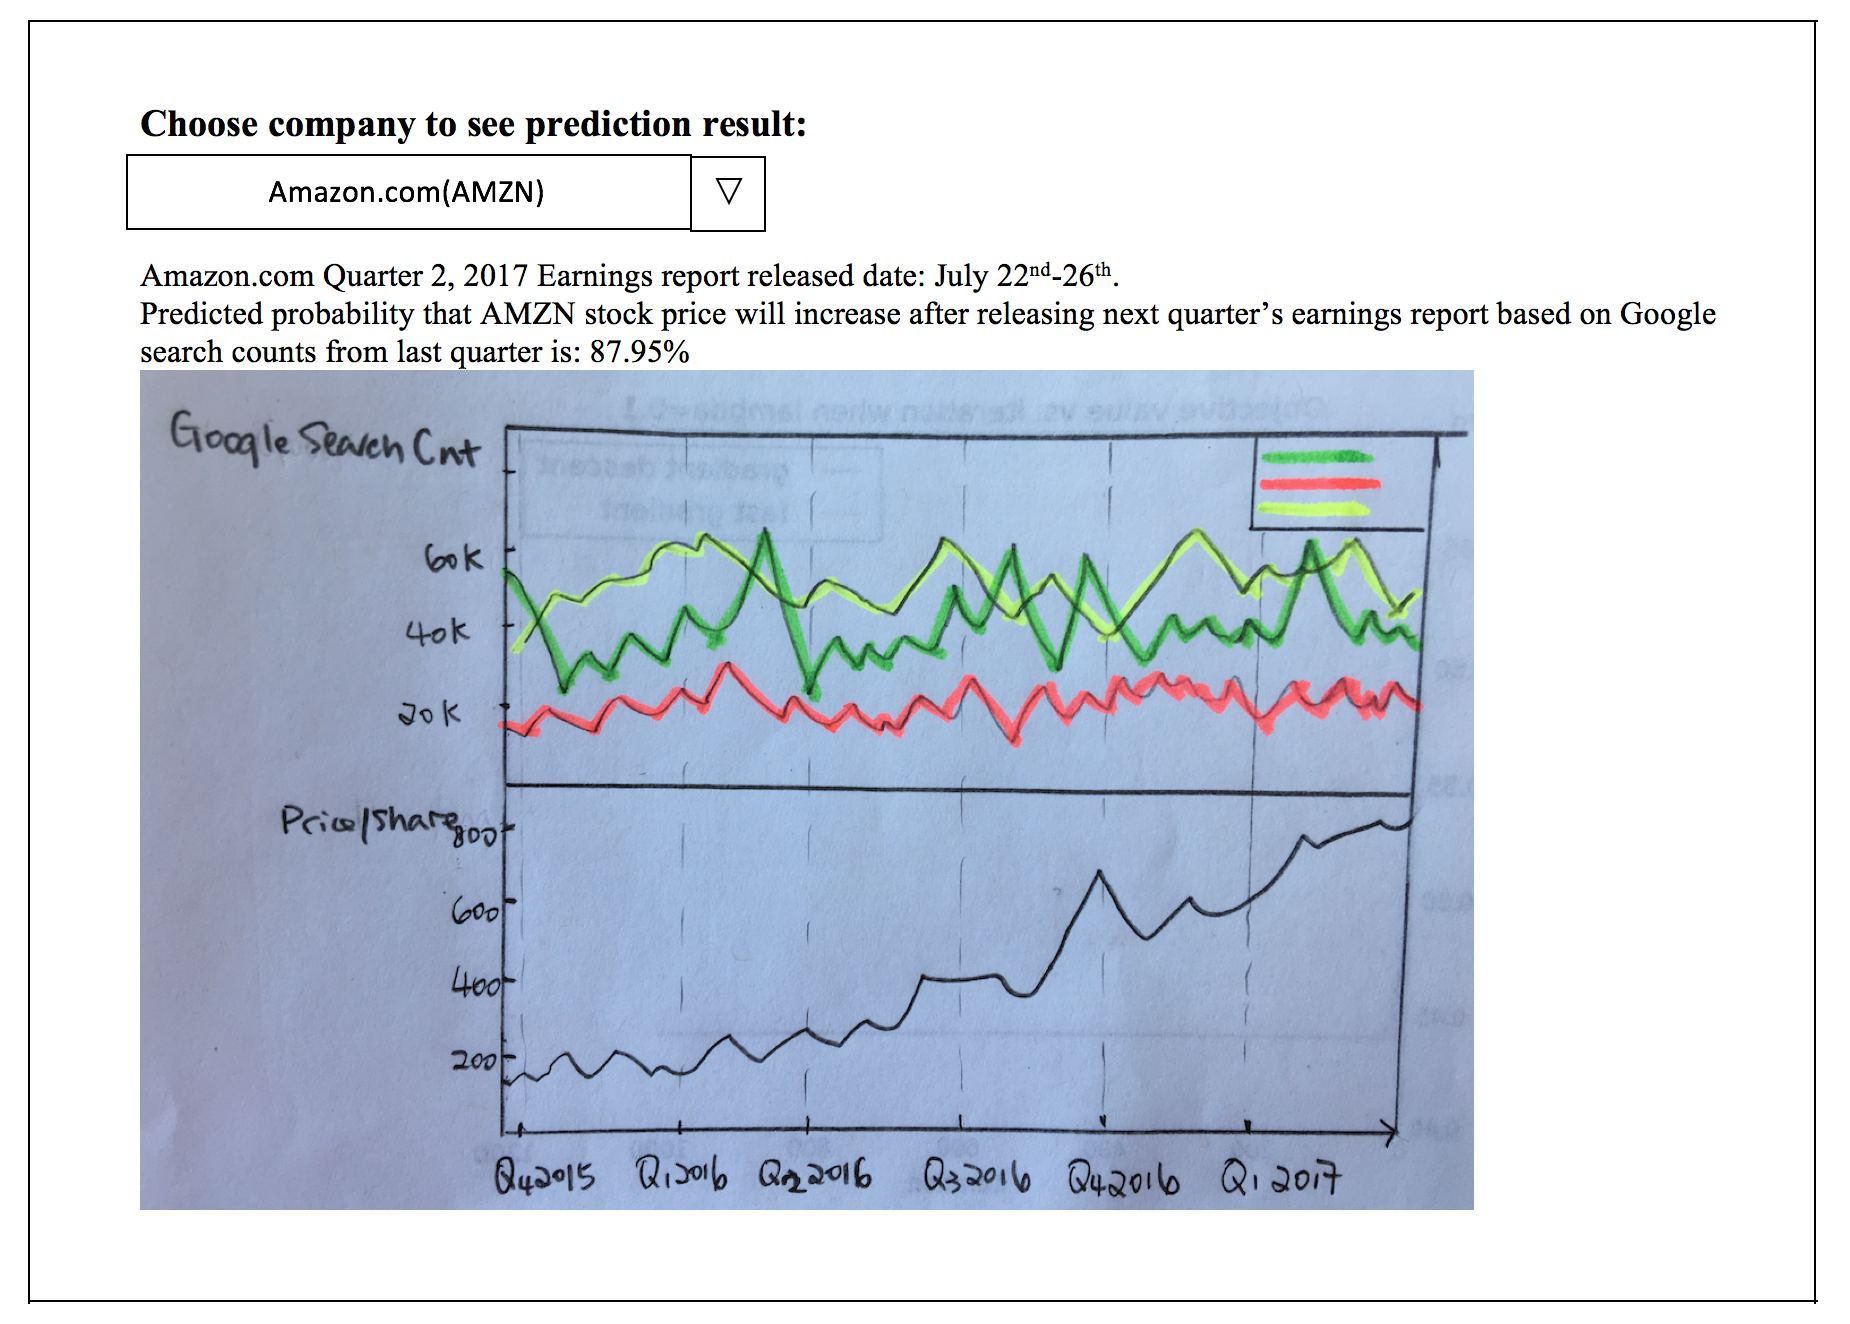

In [2]:
from IPython.display import Image
Image(filename='interface.png')

On the main screen, there are two parts. First part is a dropdown menu for user to choose the technology company that they are interested in learning more on its stock performance. And the second part is the result presented based on user’s selection. And the result consists of three sections:  
1)	Next quarter earnings report released date for selected company. The following date range will be displayed based on current date:       
Jan 27th – 31st when current date is between Oct 28th – Jan 26th.   
Apr 25th – 29th when current date is between Feb 1st – Apr 24th.  
July 22nd – 26th when current date is between Apr 30th – July 21st.  
Oct 21st – 25th when current date is between July 27th – Oct 20th.  
2)	Predicted probability the stock price of selected company will increase after releasing next quarter’s earnings report. The probability is calculated using the data of Google search results from last quarter. The calculation model is trained from Google search results data using logistic regression model.  
3)	Time series line chart displaying stock price/share change and Google search keywords counts. Keywords are categorized into three categories: Product related, Positive and Negative and are presented separately. User can zoom in and out on the chart to see different time frame of the stock performance. 


### 4.2 User interface attributes
User Input:   
Selection of company  
System Output:  
Following quarter earnings report releasing date based on today's date - String.  
Predicted probability that selected company's stock price will increase after releaseing next quarter's earning report - float.  
Graph with stock price and Google search counts information.


## **3 Functional requirements**

#### 3.1 **Who are our Users?**

Users:  
Amateur investors looking to start betting on the stock market  
Existing investors looking to verify their predictions about the stock market

#### 3.2 What level of computer experience do they require?***

The user must have a certain level of experience on how to use a web browser.  


#### 3.3 What domain knowledge must they have?

The user must have a basic domain knowledge of the following  
- What the business days are  
- What does Open/High/Low/Close prices mean  
- What a portfolio is and how to diversify it
- What the ticker symbols of a particular company are  
